#### Mall Customers Clustering

- Spending score is a metric by the mall to decide how much each customer spends over a period of time, the higher the score the higher the spending for that customer
- The team wants to understand its customers and identify some patterns within the customers of the mall
***How to understand the patterns ***
- We will create a dependent variable that will have a finite number of values e.g.4 or 5 and each being a class of the dependent variable

***Data***
[Mall Customers](../dataFiles/Mall_Customers.csv)

#### Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

In [3]:
dataset  = pd.read_csv('../dataFiles/Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values # select columns from which to learn patterns for matrix of features
#y is not needed as there is no dependent variable at this stage

In [6]:
print(x[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


#### Using the elbow method to find the optimal number of clusters

- We will use WCSS (Within Cluster Sum of squares) - sum of the square distances between each observation point and the centroid of the cluster
- The elbow graph will have the computed wcss will be on the y-axis and the x-axis the number of clusters

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

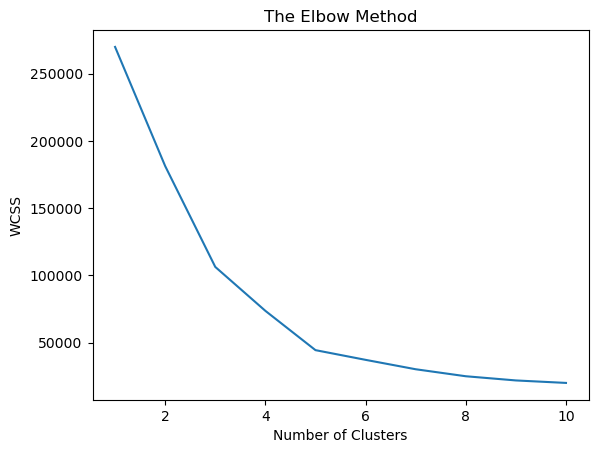

In [7]:
from sklearn.cluster import KMeans
#create a for look to run the algorithm with 10 clusters
# each time we run the KMeans we will compute the WSSS
#Iterate from 1 to 10
#initialise KMeans with  the 'k-means++' to avoid the initalisation trap
wcss = [] # holds the wcss values for each cluster
for i in range(1,11):
  kmeans =KMeans(n_clusters =i, init ='k-means++', random_state=42)
  kmeans.fit(x)
  #compute the wcss value
  wcss.append(kmeans.inertia_)

#plot the graph
plt.plot(range(1,11), wcss) 
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Training the K-Means model on the dataset

In [17]:
# from the above results can see that the optimal number of clusters is 5
kmeans =KMeans(n_clusters =5, init ='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x) # fit predict trains and returns the dependent variable corresponding to the 5 clusters grouped by similarity

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#### Visualising clusters

- involves creating scatter plots for each cluster

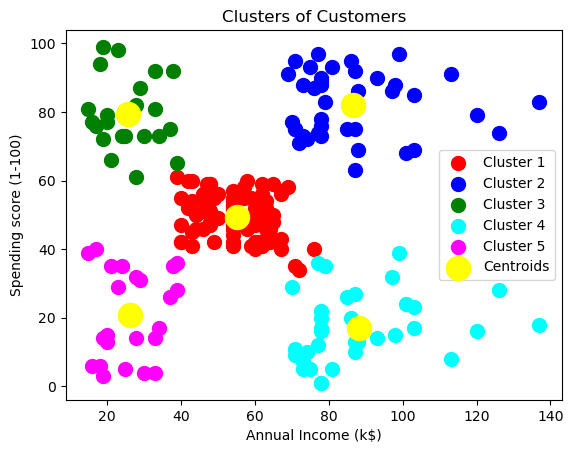

In [21]:
#rows of cluster 0 - y_kmeans ==0  - this is the rows, 0 is the first column which will be the first coordinate 
#the 1 here indicates the spending column
#s = size, c= color
plt.scatter(x[y_kmeans ==0,0], x[y_kmeans ==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans ==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans ==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans ==3,0], x[y_kmeans ==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_kmeans ==4,0], x[y_kmeans ==4, 1], s=100, c='magenta', label='Cluster 5')

#plot the centroids of each cluster using cluster_centres method
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, color='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

#### Insigghts